In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("/content/SMSSpamCollection.csv", names = ["Label", "Message"], sep = '\t')

In [ ]:
data.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.duplicated().sum()

403

In [ ]:
data = data.drop_duplicates()

In [ ]:
sw = set(stopwords.words('english'))
ps = PorterStemmer()

In [ ]:
reviews = []
for i in range(0, len(data)):
  cleaned = re.sub('[^a-zA-Z]', ' ', data['Message'].iloc[i])
  cleaned = cleaned.lower()
  cleaned = word_tokenize(cleaned)
  cleaned = [ps.stem(word) for word in cleaned if word not in sw]
  cleaned = " ".join(cleaned)
  reviews.append(cleaned)

In [ ]:
import seaborn as sns

<Axes: xlabel='Label', ylabel='count'>

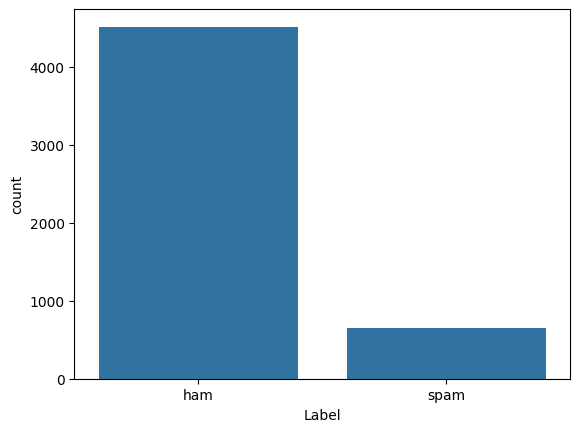

In [ ]:
sns.countplot(x = data['Label'])

In [ ]:
data['Label'].value_counts()

,count
Label,
ham,4516
spam,653


In [ ]:
encode = {'ham':0, 'spam':1}

In [ ]:
data['Label'] = data['Label'].map(encode)

## Split in X and y

In [ ]:
X = data['Message']
y = data['Label']

## Vector Representation

### Convert Text to Numerical Features (TF-IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(reviews).toarray()

## Balance the data

### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
X, y = smote.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True, stratify = y)

## Model Selection and Train

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Model Evaluation

In [ ]:
score = model.score(X_test, y_test)
print(score)

0.9872717210846708


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.99      0.99      0.99       903

    accuracy                           0.99      1807
   macro avg       0.99      0.99      0.99      1807
weighted avg       0.99      0.99      0.99      1807



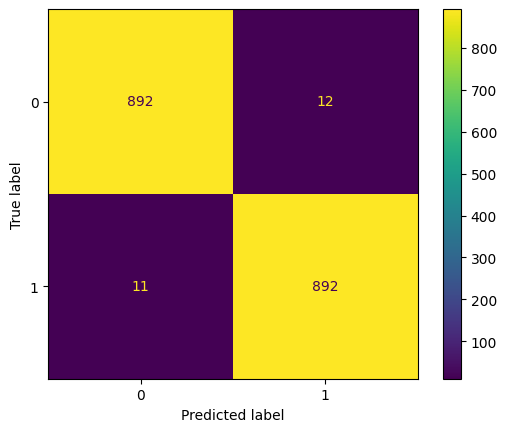

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = model.classes_)
disp.plot()